In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write
import librosa 



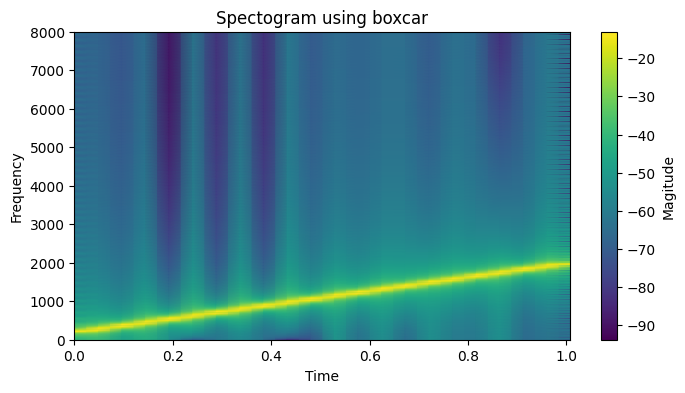

In [2]:
Fs = 16000
dur = 1.0
t = np.linspace(0, dur, int(Fs*dur), endpoint=False)
window_type = 'boxcar'
#TODO create a linear chirp signal, starting at a particular frequncy and rising linearly
x = signal.chirp(t, f0=200, f1=2000, t1=dur, method='linear')

nperseg = 1024 #This is the number of samples
noverlap = nperseg//4 #This represents the percentage overlap

#TODO Try different window types and compute the spectogram
f, tt, Zxx = signal.stft(x, fs=Fs, nperseg=nperseg, noverlap=noverlap, window=window_type)
#TODO Plot the spectogram with the different window types
plt.figure(figsize=(8,4))
plt.pcolormesh(tt, f, 20*np.log10(np.abs(Zxx)+1e-6), shading='gouraud')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title(f'Spectogram using {window_type}')
plt.colorbar(label='Magitude')
plt.show()

1) What difference do you notice in the sharpness and smoothness of the chirp line as you change the window? Explain how the window length and shape affect frequency resolution and time resolution.

In [ ]:

AUDIO_PATH = "/Users/jackhilton-jones/demonstrating/dsp/labs/digital_signal_processing_labs/286.mp3"  # change to a .wav or .mp3 on your machine

def load_audio(path):
    try:
        y, fs = librosa.load(path, sr=None, mono=True)
        return fs, y.astype(np.float64)
    except Exception:
        fs = 16_000
        t = np.linspace(0, 2.0, int(fs*2.0), endpoint=False)
        y = signal.chirp(t, f0=200, f1=2000, t1=2.0, method="linear")
        print("Note: could not read file; using a synthetic chirp instead.")
        return fs, y

fs, y = load_audio(AUDIO_PATH)

Tmax = min(len(y)/fs, 60.0)
y = y[:int(Tmax*fs)]

#TODO Compute and create a spectogram
nperseg = min(5000, len(y))           
noverlap = nperseg//4  
window = "hann"
nfft = None                          

f, t, Zxx = signal.stft(
    y, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap,
)

# TODO Plot log-spectrogram 
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, 20*np.log10(np.abs(Zxx)+1e-6), shading="gouraud")
plt.colorbar(label="Magnitude (dB)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (STFT, log magnitude)")
plt.ylim(0, min(4000, fs/2))  # y-axis up to 4 kHz like the example
plt.tight_layout()
plt.show()

# TODO Invert the spectogram
t_rec, y_rec = signal.istft(
    Zxx, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap
)

# TODO pad/truncate to original length for error metric
N = min(len(y), len(y_rec))
err = np.linalg.norm(y[:N] - y_rec[:N]) / (np.linalg.norm(y[:N]) + 1e-12)
print(f"Reconstruction relative error: {err:.3e}")

# TODO enhance the magnitude of the original signal by 0.8 and 1.2
mag = np.abs(Zxx)
phase = np.angle(Zxx)
mag_enhanced = mag ** .8
Z_enhanced = mag_enhanced * np.exp(1j * phase)

# TODO plot the new spectogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, 20*np.log10(np.abs(Z_enhanced)+1e-6), shading="gouraud")
plt.colorbar(label="Magnitude (dB)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (STFT, log magnitude)")
plt.ylim(0, min(4000, fs/2)) 
plt.tight_layout()
plt.show()


_, y_band = signal.istft(Z_enhanced, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
# Convert to 16-bit PCM
y_out_int16 = np.int16(y_band * 32767)
# Write to .wav file
write("enhanced_output.wav", fs, y_out_int16)
print("Saved enhanced_output.wav")


Nb = min(len(y), len(y_band))
err_band = np.linalg.norm(y[:Nb] - y_band[:Nb]) / (np.linalg.norm(y[:Nb]) + 1e-12)
sec = 0.1
M = int(sec*fs)
plt.figure(figsize=(10,4))
plt.plot(y[:M], label="original", alpha=0.7)
plt.plot(y_rec[:M], label="iSTFT (full)", alpha=0.8)
plt.plot(y_band[:M], label="iSTFT ", alpha=0.8)
plt.title("Waveform snippet ")
plt.xlabel("Sample"); plt.ylabel("Amplitude"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


Apply spectral gamma with γ=0.8 and γ=1.2 (keep phase), reconstruct audio, RMS-normalize both to the original, and compare spectrograms and short waveform snippets.
1) Which γ compresses vs expands spectral dynamic range? Describe audible changes and relate them to changes you observe in the spectrogram.

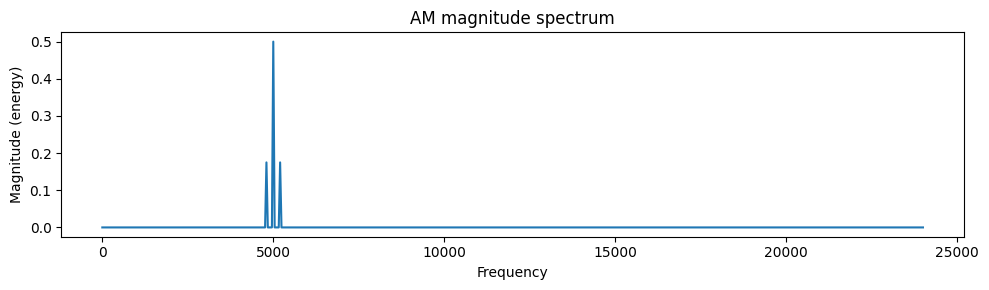

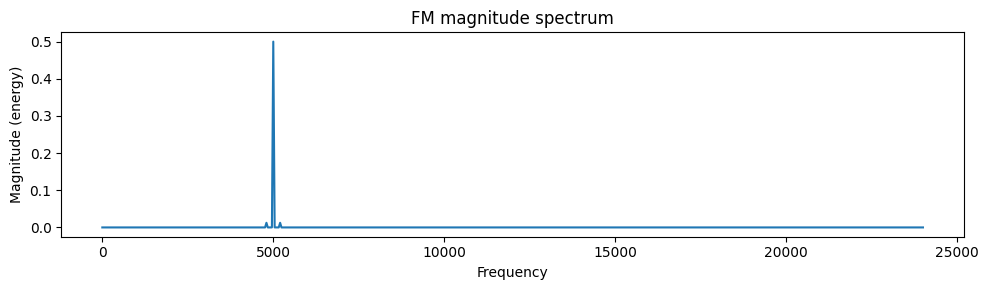

In [ ]:

Fs = 48_000
T  = 0.05
t  = np.linspace(0, T, int(Fs*T), endpoint=False)


fm = 200.0                        # message frequency [Hz]
m  = np.sin(2*np.pi*fm*t)         # message (unit amplitude)

fc = 5000.0                      # carrier [Hz]
carrier = np.cos(2*np.pi*fc*t)

#TODO compute the amplitude modulation
mu   = 0.7 # modulation depth
s_am = (1 + mu*m) * carrier

#TODO compute the frequency modulation
Df   = 10.0                      # peak frequency deviation [Hz]
beta = Df / fm                    # modulation index
s_fm = np.cos(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t))

#TODO plot the amplitude modulation
plt.figure(figsize=(10,3))
plt.magnitude_spectrum(s_am, Fs=Fs); plt.title('AM magnitude spectrum'); plt.tight_layout(); plt.show()
#TODO plot the frequency modulation
plt.figure(figsize=(10,3))
plt.magnitude_spectrum(s_fm, Fs=Fs); plt.title('FM magnitude spectrum'); plt.tight_layout(); plt.show()



Explain why the FM spectrum is wider even though the message frequency is the same as in AM.